In [8]:
import numpy
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

q = QuantumCircuit(8)

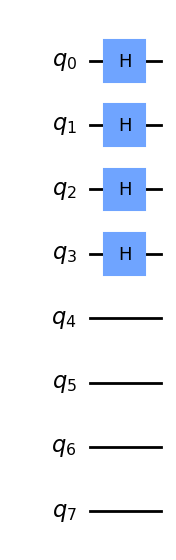

In [9]:
#Creation des qbits representant les 4 personnes

q.h(0)
q.h(1)
q.h(2)
q.h(3)

q.draw('mpl', style='clifford')

In [10]:
q.barrier()
#Ne s'affiche pas je ne sais pas pourquoi

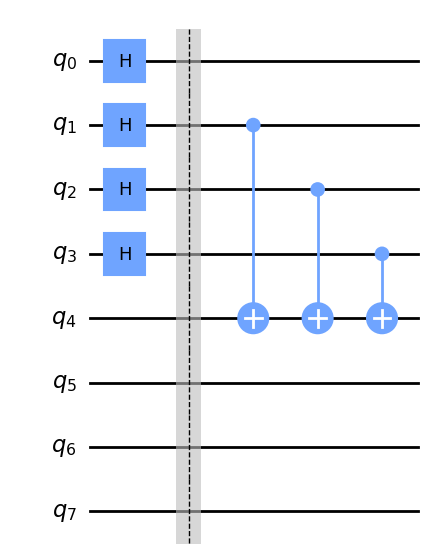

In [11]:
#la premiere personne dit ce qu'elle voit
q.cx(1,4)
q.cx(2,4)
q.cx(3,4)

q.draw('mpl', style='clifford')

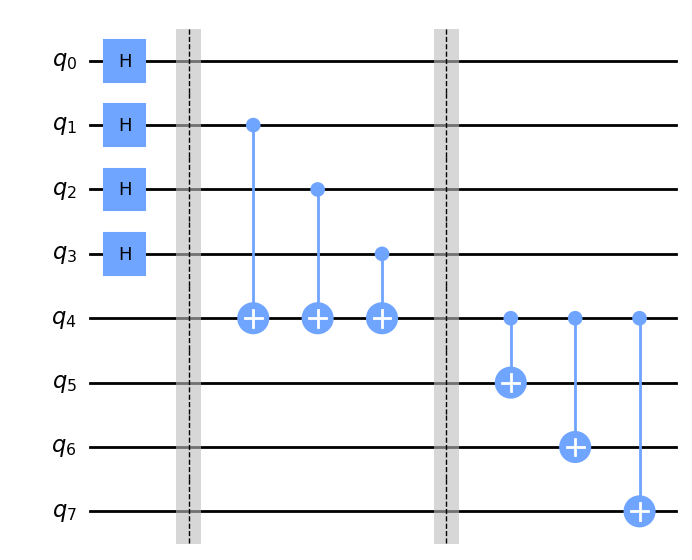

In [12]:
q.barrier()

#les autres prennent en notes

q.cx(4,5)
q.cx(4,6)
q.cx(4,7)

q.draw('mpl', style='clifford')

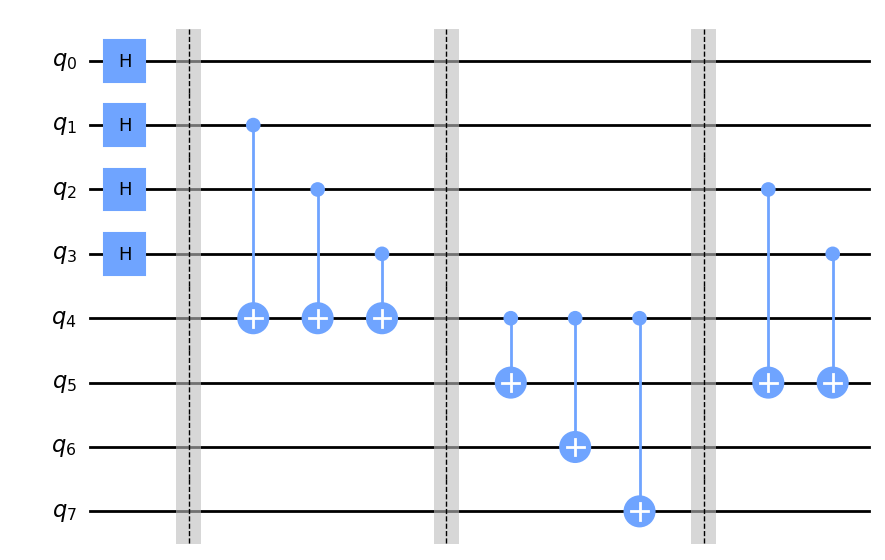

In [13]:
q.barrier()

#La deuxieme personne annonce ce qu'elle voit

q.cx(2,5)
q.cx(3,5)

q.draw('mpl', style='clifford')

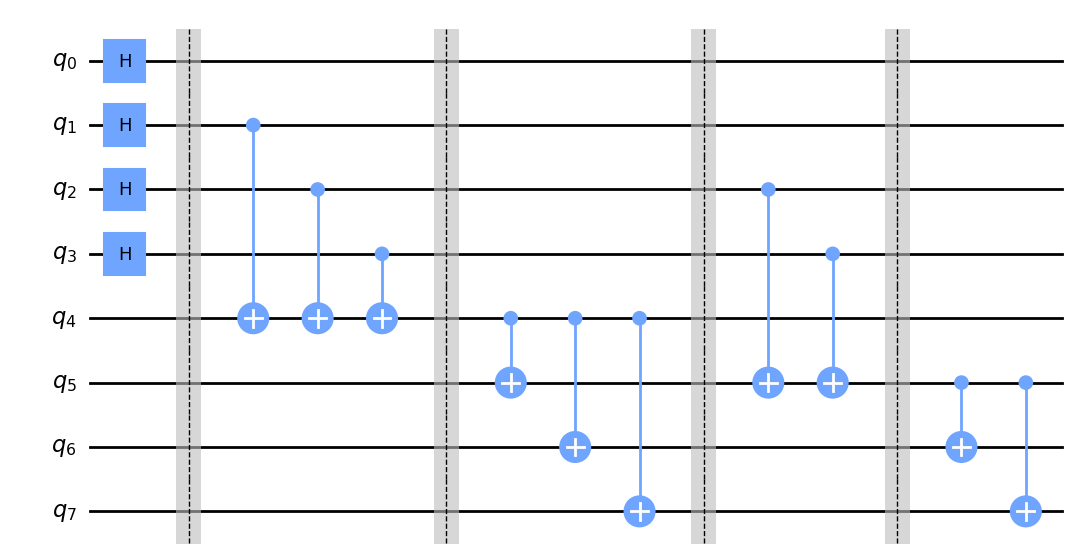

In [14]:
q.barrier()

#Les personnes restantes prennent en notes

q.cx(5,6)
q.cx(5,7)

q.draw('mpl', style='clifford')

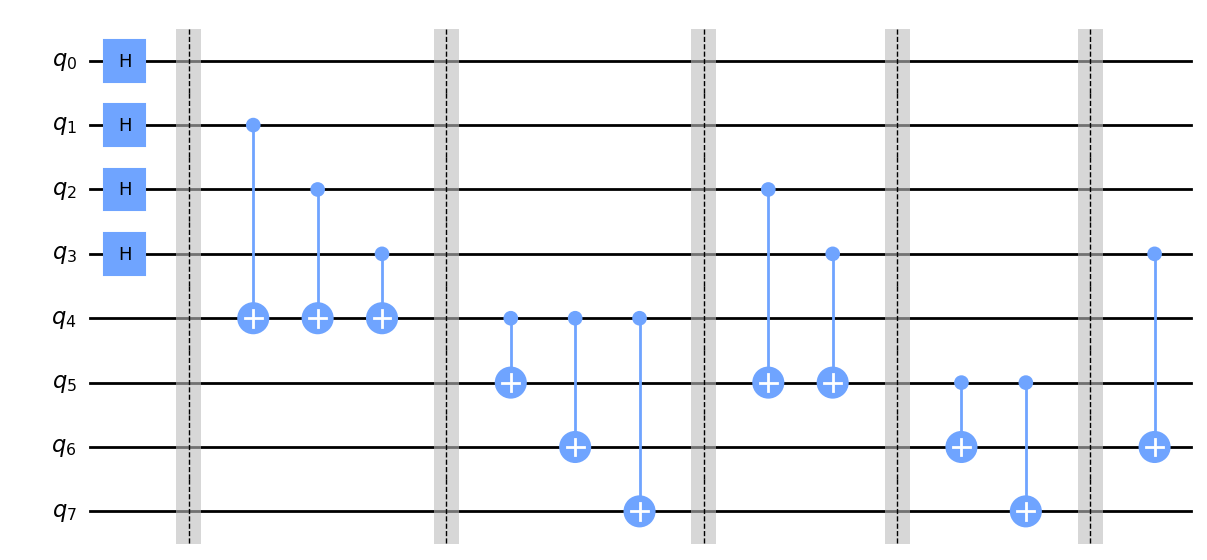

In [15]:
q.barrier()

#La troisieme personne annonce ce qu'elle voit

q.cx(3,6)

q.draw('mpl', style='clifford')

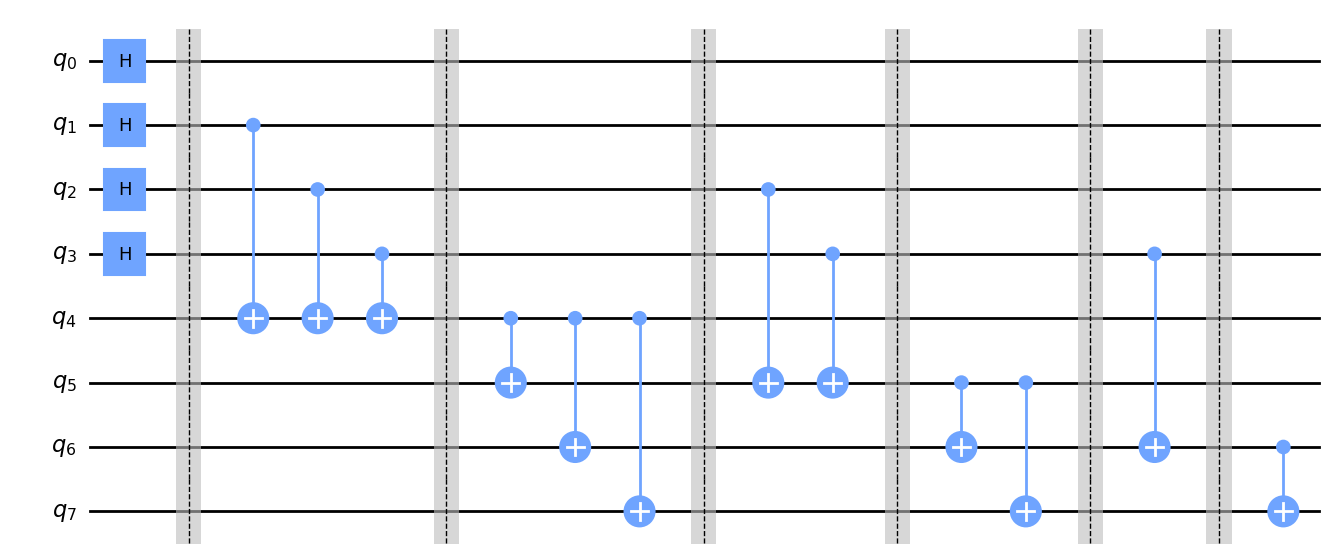

In [16]:
q.barrier()

#La derniere personne prend en note

q.cx(6,7)

q.draw('mpl', style='clifford')

In [17]:
#on prend maintenant la mesure de tous les qbits
m = QuantumCircuit(8)
m.measure_all()

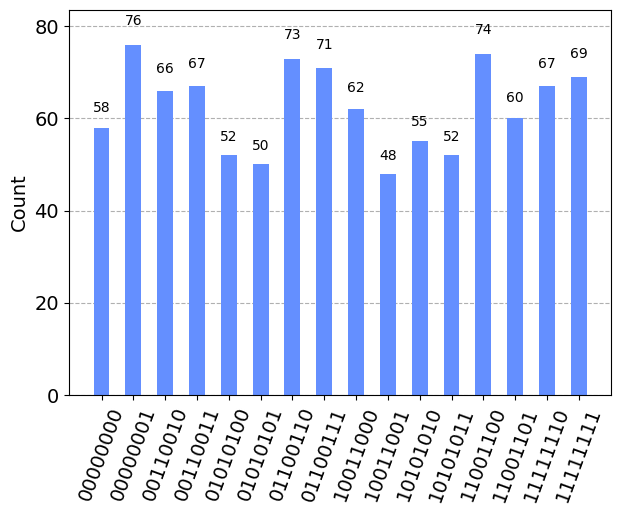

In [18]:
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
q = q.compose(m)
result = backend.run(transpile(q, backend), shots=1000).result()
counts  = result.get_counts(q)
plot_histogram(counts)

In [19]:
#on obtient donc 3 bonnes réponses 100% du temps et 4 bonnes réponses 50% du temps